## Getting Rid of Field Stars

-----------------
Author: Erin Motherway
Date: 7/6/2022

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [24]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table
from getGaiaData import GaiaClusterMembers

In [25]:
#read in phot file
photData = pd.read_csv(r'C:\Users\Claire\Documents\Code\BASE9_utils\plotting\runs\NGC6819_run15_faint_mass1_PSonly_step10x\NGC6819.phot',delim_whitespace=True)
df = pd.DataFrame(photData)
display(df)

,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,sigy_ps,mass1,massRatio,stage1,CMprior,useDBI
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.900,-9.9000,1,0.0,1,0.013,1
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.010,0.1720,1,0.0,1,0.014,1
2,100630010,13.3022,12.9060,12.3800,12.0310,11.8690,0.0541,-9.9000,-9.9000,-9.900,-9.9000,1,0.0,1,0.007,1
3,107780011,13.3640,12.7440,12.2500,11.9300,11.7740,0.0100,-9.9000,-9.9000,-9.900,-9.9000,1,0.0,1,0.023,1
4,100330015,13.3066,12.6870,12.2810,12.0270,11.9090,0.0126,-9.9000,-9.9000,-9.900,-9.9000,1,0.0,1,0.038,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,108050707,16.9935,16.5443,16.3795,16.3170,16.2767,0.0100,0.0100,0.0100,0.010,0.0100,1,0.0,1,0.066,1
684,106370710,16.9967,16.5579,16.3900,16.3328,16.2853,0.0100,0.0100,0.0100,0.010,0.0100,1,0.0,1,0.051,1
685,101280723,16.9122,16.4197,16.2417,16.0981,16.1181,0.0100,0.0184,0.0100,0.029,0.0701,1,0.0,1,0.047,1
686,100100886,16.7770,15.9378,16.9269,16.3198,16.5286,0.0100,0.4525,0.0627,0.010,0.0147,1,0.0,1,0.052,1


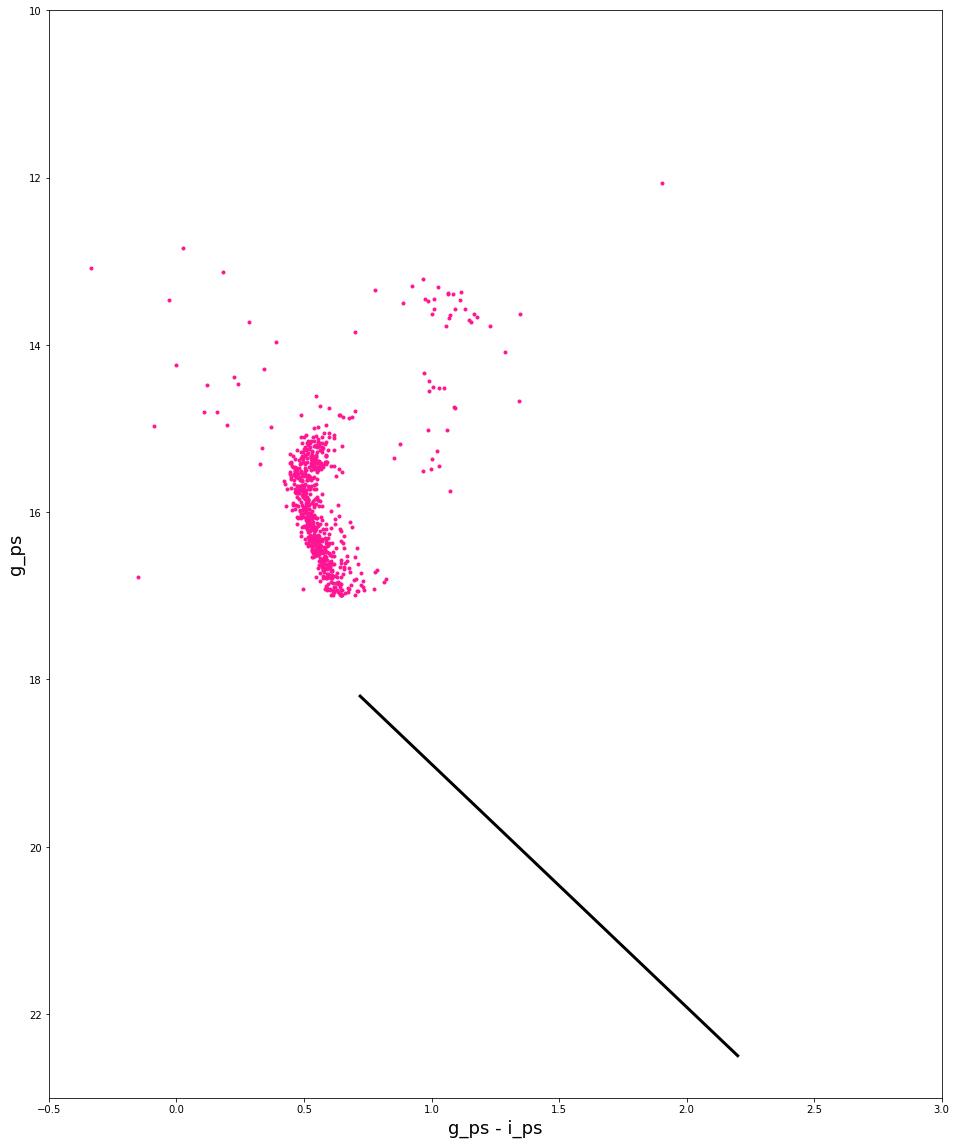

In [26]:
# plot CMD 
f, ax = plt.subplots(figsize=(16,20))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=0.72
x2=2.2

y1=18.2
y2=22.5
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [13]:
def function(input: float, input2: int):
    variable = input/input2

In [14]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 2.9054054054054057
The intercept for this line is 16.10810810810811


,id,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,sigy_ps,mass1,massRatio,stage1,CMprior,useDBI
0,100300001,12.0640,11.9650,10.1610,9.0880,8.5260,0.0100,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.013,1
1,108640002,13.2814,10.9032,9.0598,8.5864,8.8477,0.0100,0.0423,0.0100,0.0100,0.1720,1,0.0,1,0.014,1
9,100630010,13.3022,12.9060,12.3800,12.0310,11.8690,0.0541,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.007,1
10,107780011,13.3640,12.7440,12.2500,11.9300,11.7740,0.0100,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.023,1
14,100330015,13.3066,12.6870,12.2810,12.0270,11.9090,0.0126,-9.9000,-9.9000,-9.9000,-9.9000,1,0.0,1,0.038,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,122022545,99.9000,20.7890,20.0301,19.7208,19.4754,-9.9000,0.0546,0.0477,0.0141,0.0280,1,0.0,1,0.041,1
2552,120632553,99.9000,20.8465,20.1611,19.8219,19.5825,-9.9000,0.0590,0.0359,0.0378,0.0316,1,0.0,1,0.019,1
2556,121432557,99.9000,99.9000,20.4512,19.9766,19.7743,-9.9000,-9.9000,0.0736,0.1447,0.0386,1,0.0,1,0.313,1
2565,123932566,99.9000,99.9000,19.9558,99.9000,99.9000,-9.9000,-9.9000,0.0570,-9.9000,-9.9000,1,0.0,1,0.036,1


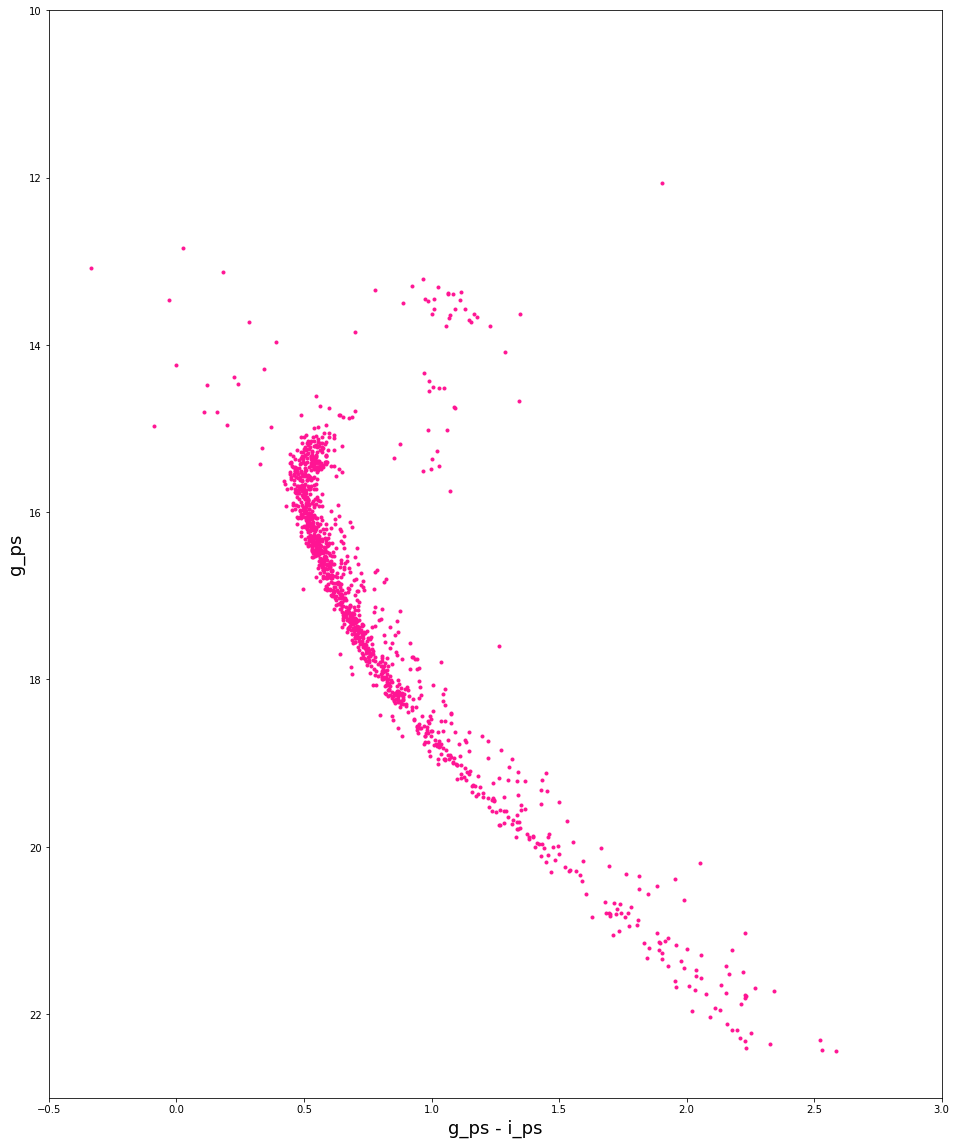

In [15]:
f, ax = plt.subplots(figsize=(16,20))
df2 = df[((m* (df['g_ps']-df['i_ps']) ) + b > df['g_ps'])]
ax.plot(df2['g_ps']-df2['i_ps'], df2['g_ps'], '.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)
df2

In [16]:
#copy this onto command line in gitbash with changed m and b values
#cat NGC6819.phot | awk '{if (NR == 1 || $5 < 3.0357*($5 - $7) + 15.928) print $0}' > NGC6819.new.phot

In [17]:
#write in new phot file
df2.to_csv("C:/Users/Claire/Documents/Code/BASE9_utils/getGaiaData/NGC6819.new.phot",sep=' ')
# foo= GaiaClusterMembers()
# foo.dumpPhotFile(Table.from_pandas(df2), filename= "C:/Users/Claire/Documents/Code/BASE9_utils/getGaiaData/NGC6819.new2.phot")

In [18]:
#read in new phot file
newPhotData = pd.read_csv('NGC6819.new.phot',delim_whitespace=True)
df3 = pd.DataFrame(newPhotData)

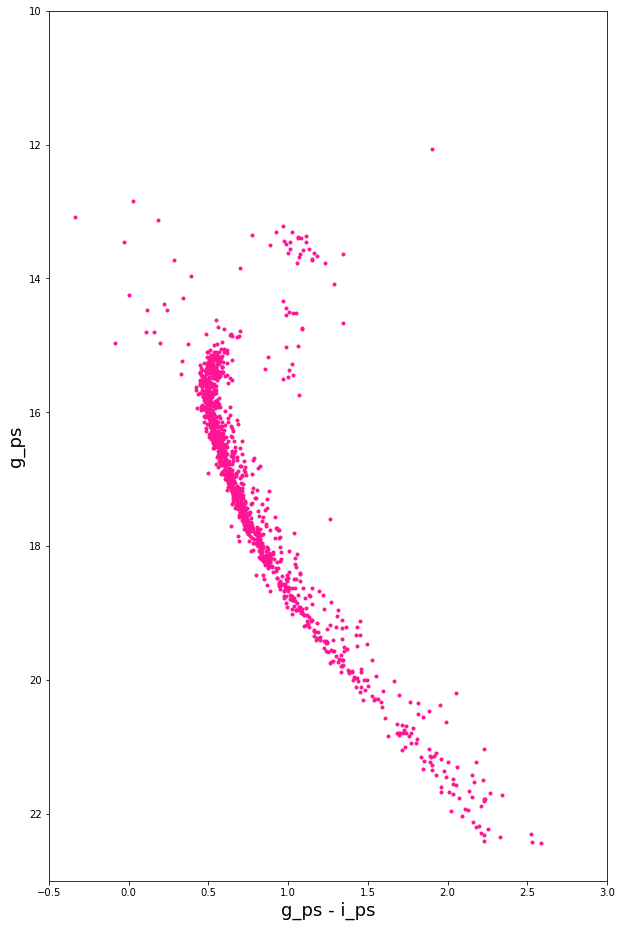

In [31]:
#plot new CMD
f, ax = plt.subplots(figsize=(10,16))
ax.plot(df3['g_ps']-df3['i_ps'],df3['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)
plt.savefig("OriginalCMD.pdf", dpi=300)